## 697. 数组的度

给定一个非空且只包含非负数的整数数组 nums，数组的度的定义是指数组里任一元素出现频数的最大值。

你的任务是在 nums 中找到与 nums 拥有相同大小的度的最短连续子数组，返回其长度。

示例 1：
```
输入：[1, 2, 2, 3, 1]
输出：2
解释：
输入数组的度是2，因为元素1和2的出现频数最大，均为2.
连续子数组里面拥有相同度的有如下所示:
[1, 2, 2, 3, 1], [1, 2, 2, 3], [2, 2, 3, 1], [1, 2, 2], [2, 2, 3], [2, 2]
最短连续子数组[2, 2]的长度为2，所以返回2.
```

示例 2：
```
输入：[1,2,2,3,1,4,2]
输出：6
```


提示：

- nums.length 在1到 50,000 区间范围内。
- nums[i] 是一个在 0 到 49,999 范围内的整数。

### My own solution

In [55]:
from typing import List

class Solution:
    def findShortestSubArray(self, nums: List[int]) -> int:
        num_dict = {}
        for num in nums:
            if num not in num_dict:
                num_dict[num] = 1
            else:
                num_dict[num] += 1
        num_list = sorted(num_dict.items(), key=lambda x:x[1], reverse=True)
        max_list = []
        max_value = num_list[0][1]
        for enum in num_list:
            if enum[1] < max_value:
                break
            else:
                max_list.append(enum)
        lengths = []
        for enum in max_list:
            num = enum[0]
            idx = self.get_index1(nums, num)
            length = idx[-1] - idx[0] + 1
            lengths.append(length)
        min_len = sorted(lengths)[0]
        return min_len

    def get_index1(self, lst=None, item='') -> List:
        return [index for (index,value) in enumerate(lst) if value == item]
    
    

In [56]:
if __name__ == "__main__":
    ss = Solution()
    nums1 = [1,2,2,3,1]
    nums2 = [1,2,2,3,1,4,2]
    nums3 = [1,3,2,2,3,1]
    # length1 = ss.findShortestSubArray(nums1)
    # length2 = ss.findShortestSubArray(nums2)
    length = ss.findShortestSubArray(nums3)
    print(length)

2


### Best Solution

<b>解题思路</b>

本题可以按照两部分求解：

- 先求原数组的度；
- 再求与原数组相同度的最短子数组。

<b>求原数组的度</b>

求数组的度--各个元素的出现次数，用 <b>字典（哈希表）计数, key 是元素，value 是次数。 value 的最大值就是数组的度</b> $degree$。

<b>求与原数组相同度的最短子数组</b>

长度 = 出现次数最多的元素 第一次和最后一次出现的位置（最短，因为可能不止一个）

- 使用 `left` 和 `right` 分别保存了每个元素在数组中第一次出现的位置和最后一次出现的位置；使用 `counter` 保存每个元素出现的次数
- 数组的度 $degree$ 等于 `counter.values()` 的最大值
- 对counter再次遍历：
  - 如果元素 k 出现的次数等于 degree，则找出元素 k 最后一次出现的位置 和 第一次出现的位置，计算两者之差+1，即为子数组长度。
  - 对所有出现次数等于 degree 的子数组的最短长度，取 min
 


In [ ]:
class Solution:
    def findShortestSubArray(self, nums: List[int]) -> int:
        left, right = dict(), dict()
        counter = collections.Counter()
        for i, num in enumerate(nums):
            if num not in left:
                left[num] = i
            right[num] = i
            counter[num] += 1
        degree = max(counter.values())
        res = len(nums)
        for k, v in counter.items():
            if v == degree:
                res = min(res, right[k] - left[k] + 1)
        return res

## 766. 托普利茨矩阵
给你一个 m x n 的矩阵 matrix 。如果这个矩阵是托普利茨矩阵，返回 true ；否则，返回 false 。

如果矩阵上**每一条**由左上到右下的对角线上的元素都相同 （注意是每一条，而不仅仅是主对角线），那么这个矩阵是 托普利茨矩阵 。


示例 1：

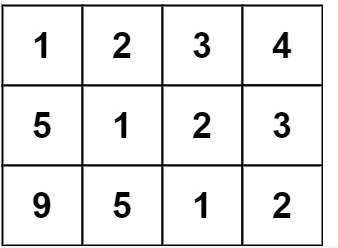
```
输入：matrix = [[1,2,3,4],[5,1,2,3],[9,5,1,2]]
输出：true
解释：
在上述矩阵中, 其对角线为: 
"[9]", "[5, 5]", "[1, 1, 1]", "[2, 2, 2]", "[3, 3]", "[4]"。 
各条对角线上的所有元素均相同, 因此答案是 True 。
```

提示：
```
m == matrix.length
n == matrix[i].length
1 <= m, n <= 20
0 <= matrix[i][j] <= 99
 ```

进阶：

如果矩阵存储在磁盘上，并且内存有限，以至于一次最多只能将矩阵的一行加载到内存中，该怎么办？
如果矩阵太大，以至于一次只能将不完整的一行加载到内存中，该怎么办？


In [47]:
from typing import List

class Solution:
    def isToeplitzMatrix(self, m: List[List[int]]) -> bool:
        return all(r1[:-1] == r2[1:] for r1, r2 in zip(m[:-1], m[1:]))


In [48]:
ss = Solution()
matrix1 = [[1,2,3,4],[5,1,2,3],[9,5,1,2]]
matrix2 = [[1,2],[2,2]]
matrix3 = [[11,74,0,93],[40,11,74,7]]
matrix4 = [[65,98,57]]
matrix5 = [[11,74,7,93],[40,11,74,7]]
matrix6 = [[36,59,71,15,26,82,87],[56,36,59,71,15,26,82],[15,0,36,59,71,15,26]]

def test(matrix):
    print(matrix, ss.isToeplitzMatrix(matrix))
"""
test(matrix1)
test(matrix2)
test(matrix4)
"""
test(matrix3)
test(matrix5)
test(matrix6)

[[11, 74, 0, 93], [40, 11, 74, 7]] False
[[11, 74, 7, 93], [40, 11, 74, 7]] True
[[36, 59, 71, 15, 26, 82, 87], [56, 36, 59, 71, 15, 26, 82], [15, 0, 36, 59, 71, 15, 26]] False


## 1052. 爱生气的书店老板
今天，书店老板有一家店打算试营业 `customers.length` 分钟。每分钟都有一些顾客（`customers[i]`）会进入书店，所有这些顾客都会在那**一分钟结束**后离开。

在某些时候，书店老板会生气。 如果书店老板在第 `i` 分钟生气，那么 `grumpy[i] = 1`，否则 `grumpy[i] = 0`。 当书店老板生气时，那**一分钟的顾客就会不满意，不生气则他们是满意的**。

书店老板知道一个秘密技巧，能抑制自己的情绪，可以让自己连续 `X ` 分钟不生气，但却只能使用一次。

请你返回这一天营业下来，**最多**有多少客户能够感到满意的数量。
 
 **示例：**
 ```
 输入：customers = [1,0,1,2,1,1,7,5], grumpy = [0,1,0,1,0,1,0,1], X = 3
输出：16
解释：
书店老板在最后 3 分钟保持冷静。
感到满意的最大客户数量 = 1 + 1 + 1 + 1 + 7 + 5 = 16.
```

提示：

- `1 <= X <= customers.length == grumpy.length <= 20000`
- `0 <= customers[i] <= 1000`
- `0 <= grumpy[i] <= 1`


增加的满意顾客的数量是 $increase_i$ , 有：

$$
 increase_i = \sum_{j=i-X+1}^i customers[j]\times grumpy[j]
$$

为了让满意的顾客数量最大化，应该找到满足 $X-1 \le i<n$ 的下标 $i$，使得 $increase_i$ 最大

注意到当 $i>X-1$ 时，将 $i$ 替换成 $i-1$，可以得到 ${increase}_{i-1}$:
$$
 increase_{i-1} = \sum_{j=i-X}^{i-1} customers[j]\times grumpy[j]
$$

将 $increase_i$ 和 ${increase}_{i-1}$ 相减：
$$
incearse_i - increase_{i-1} = customers[i]\times grumpy[i] - customers[i-X]\times grumpy[i-X]
$$

上述过程可以看成维护一个长度为 $X$ 的滑动窗口。当滑动窗口从下标范围 $[i-X,i-1]$ 移动到下标范围 $[i-X+1,i]$ 时，下标 $i-X$ 从窗口中移出，下标 $i$ 进入到窗口内。

利用这种关系，可以在 $O(1)$ 的时间内通过 ${increase}_{i-1}$得到$increase_i$

从 $\textit{increase}_X$到 $\textit{increase}_{n-1}$i的值则可利用上述关系快速计算得到。只需要遍历数组 $\textit{customers}$ 和 $grumpy$ 各一次即可得到 $X≤i<n$ 的每个 ${increase}_i$的值，时间复杂度是 $O(n)$。

只需要一开始算出 $increase_{X-1}$的值，之后迭代就可以得出所有 $increase$

又由于计算初始的 $\textit{total}$的值需要遍历数组 $\textit{customers}$ 和 $\textit{grumpy}$ 各一次，因此整个过程只需要遍历数组 $\textit{customers}$ 和 $\textit{grumpy}$各两次，时间复杂度是 $O(n)$。

$$
total = s\sum_{i=0}^{n-1}customers[i]\times I(grumpy[i]=0)
$$

在上述过程中维护增加的满意顾客的最大数量，记为 $\textit{maxIncrease}$，则满意顾客的最大总数是 $\textit{total}+\textit{maxIncrease}$。


In [ ]:
class Solution:
    def maxSatisfied(self, customers: List[int], grumpy: List[int], X: int) -> int:
        n = len(customers)
        total = sum(c for c, g in zip(customers, grumpy) if g == 0)
        maxIncrease = increase = sum(c * g for c, g in zip(customers[:X], grumpy[:X]))
        for i in range(X, n):
            increase += customers[i] * grumpy[i] - customers[i - X] * grumpy[i - X]
            maxIncrease = max(maxIncrease, increase)
        return total + maxIncrease

In [9]:
ss = Solution()
customers = [10,1,7]
grumpy = [0,0,0]
X = 2
max_num = ss.maxSatisfied(customers, grumpy, X)
print(max_num)

18


## 832. 翻转图像

给定一个二进制矩阵 A，我们想先水平翻转图像，然后反转图像并返回结果。

水平翻转图片就是将图片的每一行都进行翻转，即逆序。例如，水平翻转 [1, 1, 0] 的结果是 [0, 1, 1]。

反转图片的意思是图片中的 0 全部被 1 替换， 1 全部被 0 替换。例如，反转 [0, 1, 1] 的结果是 [1, 0, 0]。

示例 1：

```
输入：[[1,1,0],[1,0,1],[0,0,0]]
输出：[[1,0,0],[0,1,0],[1,1,1]]
解释：首先翻转每一行: [[0,1,1],[1,0,1],[0,0,0]]；
     然后反转图片: [[1,0,0],[0,1,0],[1,1,1]]
```

示例 2：

```
输入：[[1,1,0,0],[1,0,0,1],[0,1,1,1],[1,0,1,0]]
输出：[[1,1,0,0],[0,1,1,0],[0,0,0,1],[1,0,1,0]]
解释：首先翻转每一行: [[0,0,1,1],[1,0,0,1],[1,1,1,0],[0,1,0,1]]；
```

提示：
```
1 <= A.length = A[0].length <= 20
0 <= A[i][j] <= 1
```

In [60]:
from typing import List
import numpy as np
import math

class Solution:
    def flipAndInvertImage(self, A: List[List[int]]) -> List[List[int]]:
        row_num, col_num = np.shape(A)[0], np.shape(A)[1]
        for i in range(row_num):
            for j in range(math.ceil(col_num/2)):
                if j != col_num - j -1:
                    tmp = A[i][j]
                    A[i][j] = A[i][col_num - j - 1]
                    A[i][col_num-j-1] = tmp
                    A[i][j] = int(not A[i][j])
                    A[i][col_num-j-1] = int(not A[i][col_num-j-1])
                else:
                    A[i][col_num-j-1] = int(not A[i][col_num-j-1])
                    pass               
        return A

In [61]:
ss = Solution()
A1 = [[1,1,0],[1,0,1],[0,0,0]]  
A2 = [[1,1,0,0],[1,0,0,1],[0,1,1,1],[1,0,1,0]]
O1 = ss.flipAndInvertImage(A1)   #[[1,0,0],[0,1,0],[1,1,1]]
O2 = ss.flipAndInvertImage(A2)   # [[1,1,0,0],[0,1,1,0],[0,0,0,1],[1,0,1,0]]
print(O1)
print(O2)

[[1, 0, 0], [0, 1, 0], [1, 1, 1]]
[[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 0, 1, 0]]


### 方法一：照本宣科法

In [65]:
from typing import List

class Solution:
    def flipAndInvertImage(self, A: List[List[int]]) -> List[List[int]]:
        for row in A:
            for k, _ in enumerate(row): row[k] = 1 - row[k]
            i, j = 0, len(row)-1
            while i < j:
                row[i], row[j] = row[j], row[i]
                i += 1
                j -= 1
        return A

In [66]:
ss = Solution()
A1 = [[1,1,0],[1,0,1],[0,0,0]]  
A2 = [[1,1,0,0],[1,0,0,1],[0,1,1,1],[1,0,1,0]]
O1 = ss.flipAndInvertImage(A1)   #[[1,0,0],[0,1,0],[1,1,1]]
O2 = ss.flipAndInvertImage(A2)   # [[1,1,0,0],[0,1,1,0],[0,0,0,1],[1,0,1,0]]
print(O1)
print(O2)

[[1, 0, 0], [0, 1, 0], [1, 1, 1]]
[[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 0, 1, 0]]


复杂度:

时间复杂度 $O(N)$，做了两次遍历，而 $O(2N) = O(N)$

空间复杂度 $O(1)$，只用了常量空间，没有用额外的空间

### 方法二：见缝插针法

首先我们一行的第一个数，找到它对应的数，也就是这一行最后一个

如果这两个数是不同的，比如说一个是 1，一个是 0，那么先 10 反转，则一个是 0，一个是 1，再左右翻转，又变回一个是 1，一个是 0

这说明当两个数是不同的时候，不用做任何事情

当两个数相同的时候，要同时异或或被 1 减，即 10 反转

注意，循环的范围应该是 range(len(row) + 1) // 2)，不能忘了加一。因为，如果列数为奇数，那么中间的数虽然不要左右交换，但是10还是要反转的，因此要多一次循环，相同于中间的数与自己是相同的，要反转。

In [81]:
from typing import List

class Solution:
    def flipAndInvertImage(self, A: List[List[int]]) -> List[List[int]]:
        for row in A:
            for j in range((len(row)+1) // 2):
                if row[j] == row[len(row) - j - 1]:
                    row[j] = row[len(row) - j - 1] = 1 - row[j]
        return A

In [82]:
ss = Solution()
A1 = [[1,1,0],[1,0,1],[0,0,0]]  
A2 = [[1,1,0,0],[1,0,0,1],[0,1,1,1],[1,0,1,0]]
O1 = ss.flipAndInvertImage(A1)   #[[1,0,0],[0,1,0],[1,1,1]]
O2 = ss.flipAndInvertImage(A2)   # [[1,1,0,0],[0,1,1,0],[0,0,0,1],[1,0,1,0]]
print(O1)
print(O2)

[[1, 0, 0], [0, 1, 0], [1, 1, 1]]
[[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 0, 1, 0]]
